# sklearn 实现PCA主成分分析

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [4]:
x, y = load_wine(return_X_y=True)

In [11]:
np.unique(y)

array([0, 1, 2])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)  # 分割训练集与测试集

In [6]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

`fit_transorm()`:标准化自变量.计算公式如下:$$ans = (x - mean(x))/std(x)$$
通过下面的检验可以发现结果是一样的

In [7]:
def show_acc(a, b):
    acc = a.ravel() == b.ravel()
    return np.mean(acc)

In [8]:
# Demo of sklearn.decomposition.KernelPCA

from sklearn.datasets import load_iris
from sklearn.decomposition import KernelPCA, PCA
import matplotlib.pyplot as plt
import numpy as np  # Youcans， XUPT

X, y = load_iris(return_X_y=True)
print(type(X))  # <class 'numpy.ndarray'>

modelPCA = PCA(n_components=2)  # 建立模型，设定保留主成分数 K=2
Xpca = modelPCA.fit_transform(X)  # 用数据集 X 训练 模型 modelKPCA

modelKpcaP = KernelPCA(n_components=2, kernel='poly')  # 建立模型，核函数：多项式
XkpcaP = modelKpcaP.fit_transform(X)  # 用数据集 X 训练 模型 modelKPCA

modelKpcaR = KernelPCA(n_components=2, kernel='rbf')  # 建立模型，核函数：径向基函数
XkpcaR = modelKpcaR.fit_transform(X)  # 用数据集 X 训练 模型 modelKPCA

modelKpcaS = KernelPCA(n_components=2, kernel='cosine')  # 建立模型，核函数：余弦函数
XkpcaS = modelKpcaS.fit_transform(X)  # 用数据集 X 训练 模型 modelKPCA

<class 'numpy.ndarray'>


令特征向量为$X$,特征值为$\alpha$
则，`fit_transform()`函数对数据集进行如下操作：
$$ X*\sqrt{\alpha}$$

In [9]:
Xpca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

C:\Users\29236\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


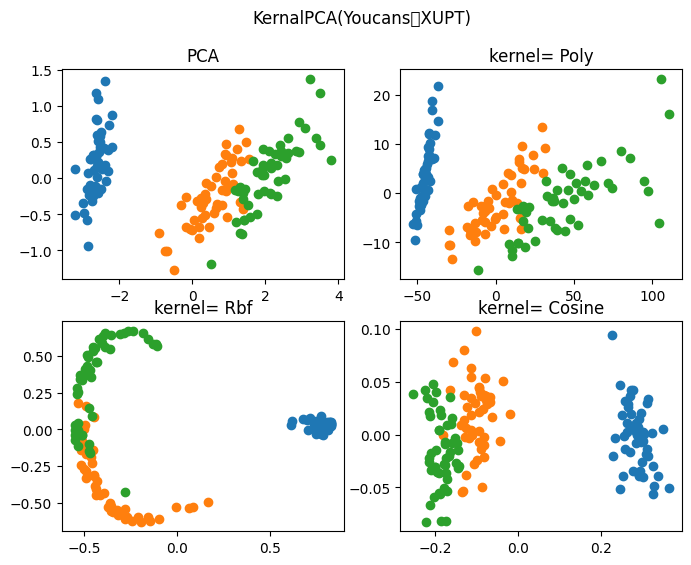

In [10]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
for label in np.unique(y):
    position = y == label
    ax1.scatter(Xpca[position, 0], Xpca[position, 1], label='target=%d' % label)
    ax1.set_title('PCA')
    ax2.scatter(XkpcaP[position, 0], XkpcaP[position, 1], label='target=%d' % label)
    ax2.set_title('kernel= Poly')
    ax3.scatter(XkpcaR[position, 0], XkpcaR[position, 1], label='target=%d' % label)
    ax3.set_title('kernel= Rbf')
    ax4.scatter(XkpcaS[position, 0], XkpcaS[position, 1], label='target=%d' % label)
    ax4.set_title('kernel= Cosine')
plt.suptitle("KernalPCA(Youcans，XUPT)")
plt.show()